<a href="https://colab.research.google.com/github/Audrey-ai/Supervised-and-unsupervised-learning-applicationin-R/blob/main/Part1_Supervised_learning_application_on_Ad_clicking_data_using_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Defining the Question

###a) Specification of Data Analytical Question

The purpose of the research as a data scientist is to help a Kenyan entrepreneur that has created an online cryptography course and would like to advertise it on her blog, identify which individuals are most likely to click on her ads based on past data for other ads through supervised learning application.

###b) Determining the metric for success

The research will be considered a success if we are able to successfully identify which individuals are most likely to click on her ads,all aimed at advertising the created course through application of supervised learning methods.

###c) Understanding the context

A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She would now like to employ your services as a Data Science Consultant to help her identify which individuals are most likely to click on her ads.

###d) Recording the Experimental Design

Experimental design refers to how participants are allocated to the different conditions in a reaserch or experiment. The experimental design used is Independent measures design, also known as between-groups,which is an experimental design where different participants are used in each condition of the independent variable. This means that each condition of the experiment includes a different group of participants.

###e) Data Relevance

The data we have to help us in our research is relevant with a number of variables helping us achieve our set objective of finding out who are most likely to click on her ads.Daily time spent on site,Income, daily internet usage,age,ad topic line are just some of the variables which have a lot of relevance in regards to our research. 

#2. Reading and Checking of data

In [119]:
#Load the readr library to bring in the dataset
library(readr)

#Reading and checking the advertising data
Ad <- read.csv('advertising.csv')
head(Ad)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
4,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
5,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
6,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [120]:
#Checking the dimensions of the table

dim(Ad)

#There are 1000 rows and 10 columns

[1] 1000   10

In [121]:
#Displaying the type and a preview of all columns
#

library(dplyr)
glimpse(Ad)

Rows: 1,000
Columns: 10
$ Daily.Time.Spent.on.Site <dbl> 68.95, 80.23, 69.47, 74.15, 68.37, 59.99, 88.…
$ Age                      <int> 35, 31, 26, 29, 35, 23, 33, 48, 30, 20, 49, 3…
$ Area.Income              <dbl> 61833.90, 68441.85, 59785.94, 54806.18, 73889…
$ Daily.Internet.Usage     <dbl> 256.09, 193.77, 236.50, 245.89, 225.58, 226.7…
$ Ad.Topic.Line            <chr> "Cloned 5thgeneration orchestration", "Monito…
$ City                     <chr> "Wrightburgh", "West Jodi", "Davidton", "West…
$ Male                     <int> 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, …
$ Country                  <chr> "Tunisia", "Nauru", "San Marino", "Italy", "I…
$ Timestamp                <chr> "2016-03-27 00:53:11", "2016-04-04 01:39:02",…
$ Clicked.on.Ad            <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, …


In [122]:
#Checking on summary statistics of numeric variables

summary(Ad)

 Daily.Time.Spent.on.Site      Age         Area.Income    Daily.Internet.Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
 Ad.Topic.Line          City                Male         Country         
 Length:1000        Length:1000        Min.   :0.000   Length:1000       
 Class :character   Class :character   1st Qu.:0.000   Class :character  
 Mode  :character   Mode  :character   Median :0.000   Mode  :character  
                                       Mean   :0.481                     
                                       3rd Qu.:1.000                     
   

#3. Data Cleaning

In [123]:
#Checking for missing values in the columns of our dataset
#

colSums(is.na(Ad))

#There is no missing data in any column

Daily.Time.Spent.on.Site                      Age              Area.Income 
                       0                        0                        0 
    Daily.Internet.Usage            Ad.Topic.Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked.on.Ad 
                       0

In [124]:
#Checking for duplicate data
#

duplicated <- Ad[duplicated(Ad),]
duplicated

#There are no duplicates in our data

Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>


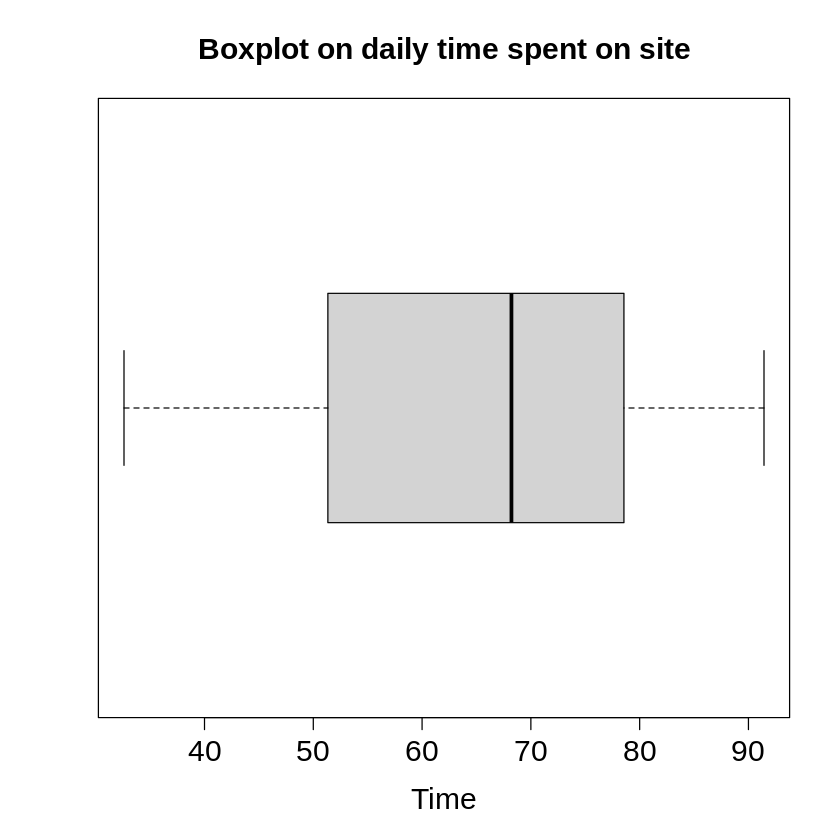

In [125]:
#Checking for outliers in time spent on site column
#

boxplot(Ad$Daily.Time.Spent.on.Site, 
main = "Boxplot on daily time spent on site",
xlab = "Time",
horizontal=TRUE,
cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)

#There are no outliers

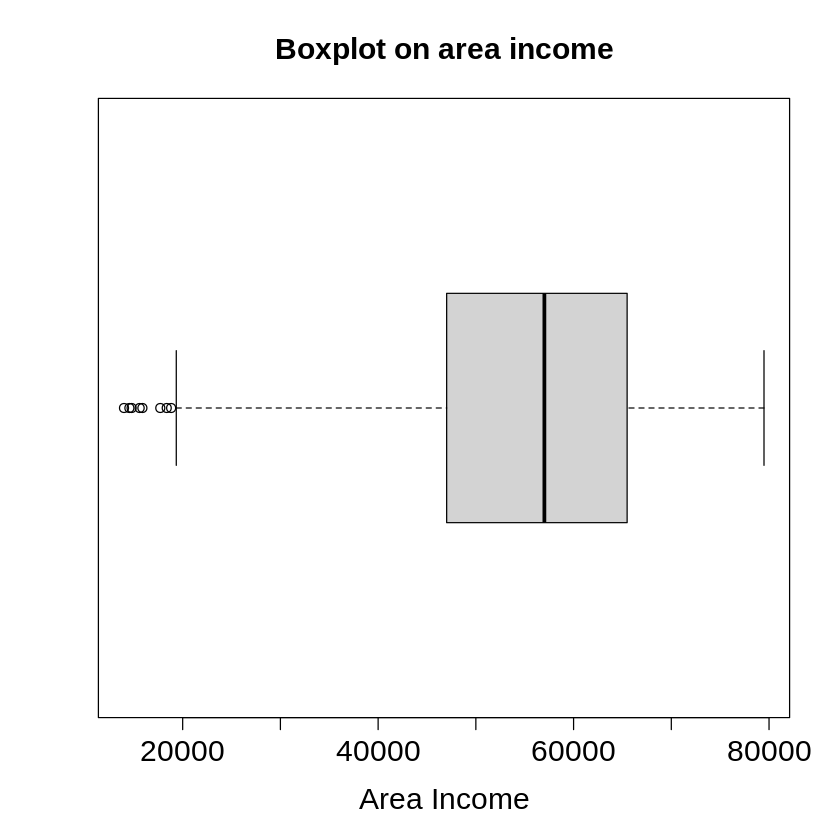

In [126]:
#Checking for outliers in area income column
#

boxplot(Ad$Area.Income, 
main = "Boxplot on area income",
xlab = "Area Income",
horizontal=TRUE,
cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)

#There a a few outliers close to third quartile so we will not drop them

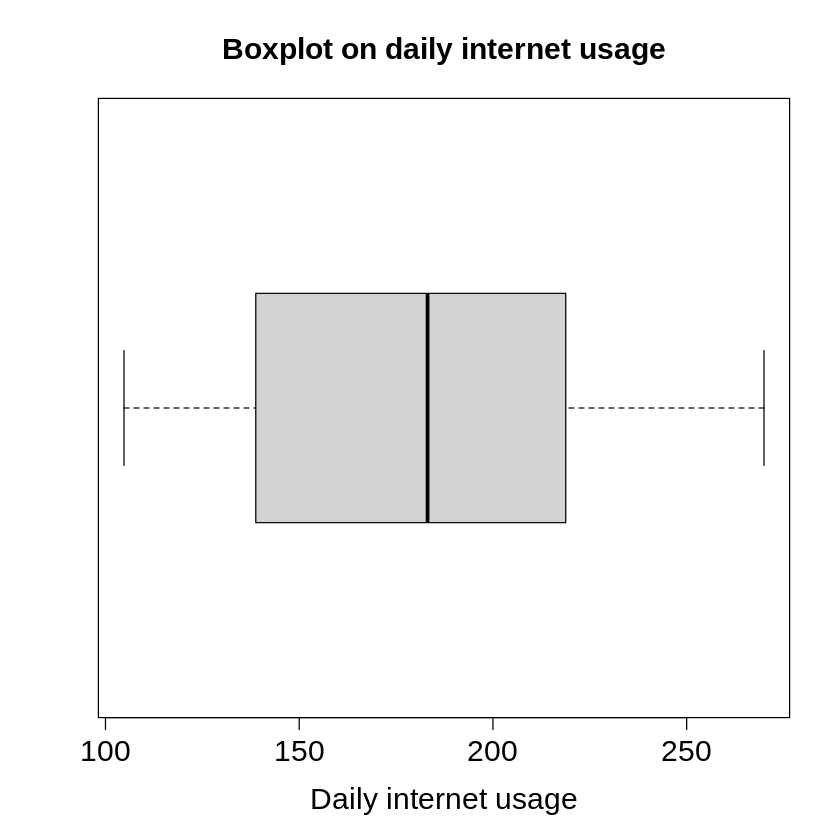

In [127]:
#Checking for outliers in Daily internet usage column
#

boxplot(Ad$Daily.Internet.Usage, 
main = "Boxplot on daily internet usage",
xlab = "Daily internet usage",
horizontal=TRUE,
cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)

#There are no outliers in this column

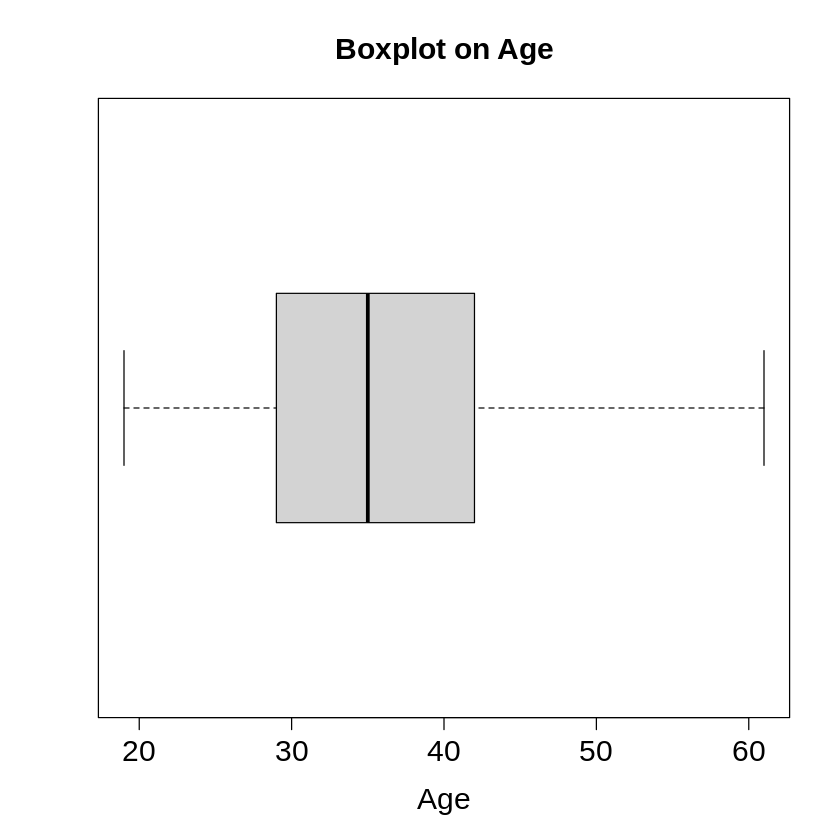

In [128]:
#Checking for outliers in area income column
#

boxplot(Ad$Age, 
main = "Boxplot on Age",
xlab = "Age",
horizontal=TRUE,
cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)

#There are no outliers in the age column

#4. Exploratory Data Analysis

#4.a)Univariate Analysis

4.1.a) Measures of Central tendency and dispersion

In [129]:
#First checking out the class of each column

cls <- sapply(Ad, class)
cls

#Next selecting Numeric Variables
Numeric_Variables <- Ad %>% select(which(cls != "character"))
head(Numeric_Variables)


#Excluding categorical numerical variables to remain with only continuous variables
Continuous_Variables <- Numeric_Variables[,1:4]
head(Continuous_Variables)


Daily.Time.Spent.on.Site                      Age              Area.Income 
               "numeric"                "integer"                "numeric" 
    Daily.Internet.Usage            Ad.Topic.Line                     City 
               "numeric"              "character"              "character" 
                    Male                  Country                Timestamp 
               "integer"              "character"              "character" 
           Clicked.on.Ad 
               "integer"

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Male,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>
1,68.95,35,61833.90,256.09,0,0
2,80.23,31,68441.85,193.77,1,0
3,69.47,26,59785.94,236.50,0,0
4,74.15,29,54806.18,245.89,1,0
5,68.37,35,73889.99,225.58,0,0
6,59.99,23,59761.56,226.74,1,0


,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage
,<dbl>,<int>,<dbl>,<dbl>
1,68.95,35,61833.90,256.09
2,80.23,31,68441.85,193.77
3,69.47,26,59785.94,236.50
4,74.15,29,54806.18,245.89
5,68.37,35,73889.99,225.58
6,59.99,23,59761.56,226.74


In [130]:
#Summary Statistics on Continuous Variables
#

summary(Continuous_Variables)

#From the below summary, we can be able to tell the minimum, maximum,median,mean,1st and 3rd quartiles
#and range of selected continuous variables

 Daily.Time.Spent.on.Site      Age         Area.Income    Daily.Internet.Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       

In [131]:
#Getting the mode for all columns
#

getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

Daily_Time_Spent <- getmode(Ad$Daily.Time.Spent.on.Site)
print('Daily.Time.Spent.on.Site')
Daily_Time_Spent

Country_mode <- getmode(Ad$Country)
print('Country')
Country_mode

Age_mode <- getmode(Ad$Age)
print('Age')
Age_mode

Male_mode <- getmode(Ad$Male)
print('Male')
Male_mode

Click_on_ad_Mode <- getmode(Ad$Clicked.on.Ad)
print('Clicked.on.ad')
Click_on_ad_Mode

ad_Topic_Mode <- getmode(Ad$Ad.Topic.Line)
print('Ad.Topic.Line')
ad_Topic_Mode

Area_Income_Mode <- getmode(Ad$Area.Income)
print('Area.Income')
Area_Income_Mode

City_Mode <- getmode(Ad$City)
print('City')
City_Mode

Daily_Net_Use_Mode <- getmode(Ad$Daily.Internet.Usage)
print('Daily.Internet.Usage')
Daily_Net_Use_Mode

Timestamp_Mode <- getmode(Ad$Timestamp)
print('Timestamp')
Timestamp_Mode

[1] "Daily.Time.Spent.on.Site"


[1] 62.26

[1] "Country"


[1] "Czech Republic"

[1] "Age"


[1] 31

[1] "Male"


[1] 0

[1] "Clicked.on.ad"


[1] 0

[1] "Ad.Topic.Line"


[1] "Cloned 5thgeneration orchestration"

[1] "Area.Income"


[1] 61833.9

[1] "City"


[1] "Lisamouth"

[1] "Daily.Internet.Usage"


[1] 167.22

[1] "Timestamp"


[1] "2016-03-27 00:53:11"

In [132]:
#Finding the variance of continous variables
#

var(Continuous_Variables)

#the variance of ontinuous variables can be obtained along the diagonal column of the below output

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage
Daily.Time.Spent.on.Site,251.33709,-46.17415,66130.81,360.9919
Age,-46.17415,77.18611,-21520.93,-141.6348
Area.Income,66130.81091,-21520.92580,179952405.95,198762.5315
Daily.Internet.Usage,360.99188,-141.63482,198762.53,1927.4154


4.1.b) Univariate Analysis plots

Gender
  0   1 
519 481 

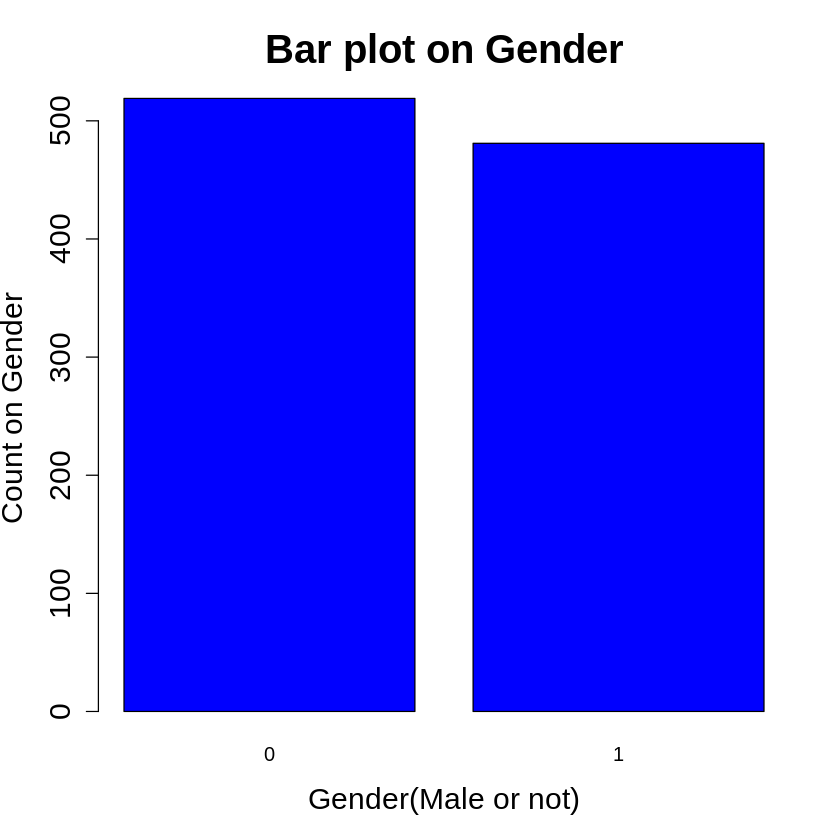

In [133]:
#Creating bar plot on Gender(Male or not)
#
#First creating frequency distribution on whether male or not(gender)
#

Gender <- Ad$Male
Male_frequency <- table(Gender)
Male_frequency

#Creating a bar plot to reflect the same
barplot(Male_frequency,
main = 'Bar plot on Gender',
xlab = 'Gender(Male or not)',
ylab = 'Count on Gender',
col = 'Blue',
cex.lab=1.5, cex.axis=1.5, cex.main=2.0, cex.sub=1.5)

#Majority of customers are not male

ad_Click
  0   1 
500 500 

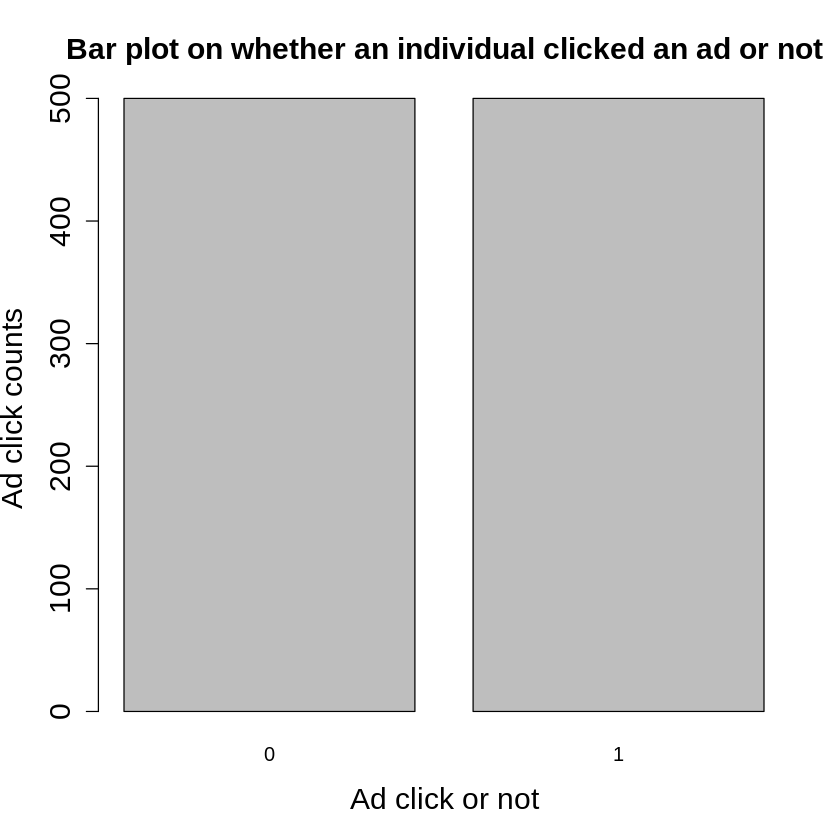

In [134]:
#Creating bar plot on whether an individual clicked on Ad or not
#
#First creating frequency distribution on ad clicking
#

ad_Click <- Ad$Clicked.on.Ad
Click_frequency <- table(ad_Click)
Click_frequency

#Creating a bar plot to reflect the same
barplot(Click_frequency,
main = 'Bar plot on whether an individual clicked an ad or not',
xlab = 'Ad click or not',
ylab = 'Ad click counts',
cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)

#There is equal distribution on whether clicked an ad or not 

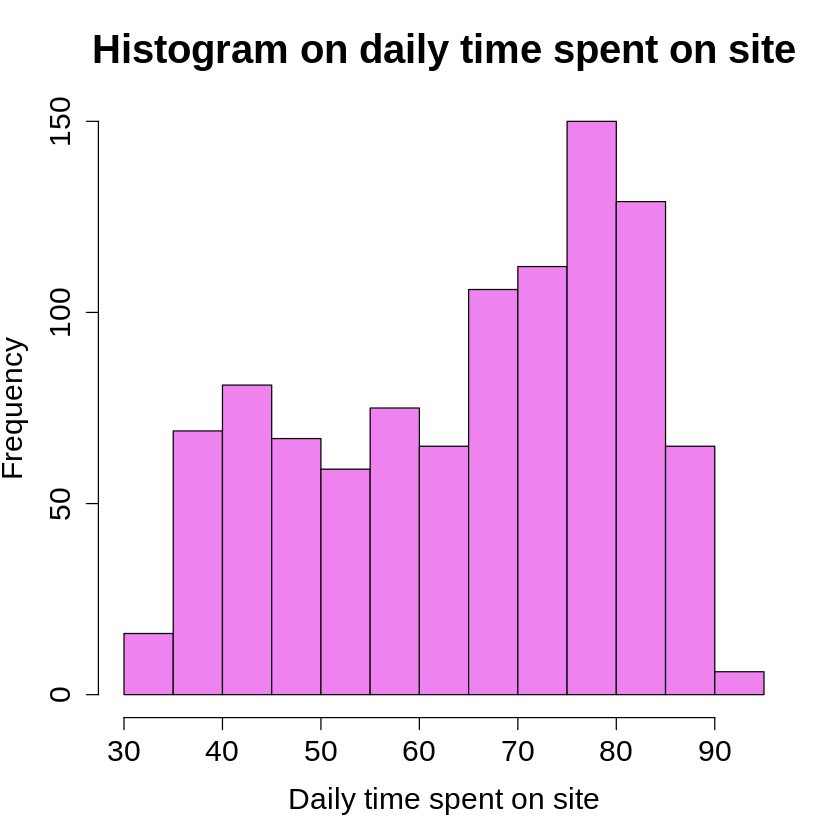

In [135]:
#Histogram on daily time spent on site

hist(Ad$Daily.Time.Spent.on.Site,
main = "Histogram on daily time spent on site",
xlab = "Daily time spent on site",
ylab = 'Frequency',
col = 'Violet',
cex.lab=1.5, cex.axis=1.5, cex.main=2.0, cex.sub=1.5)


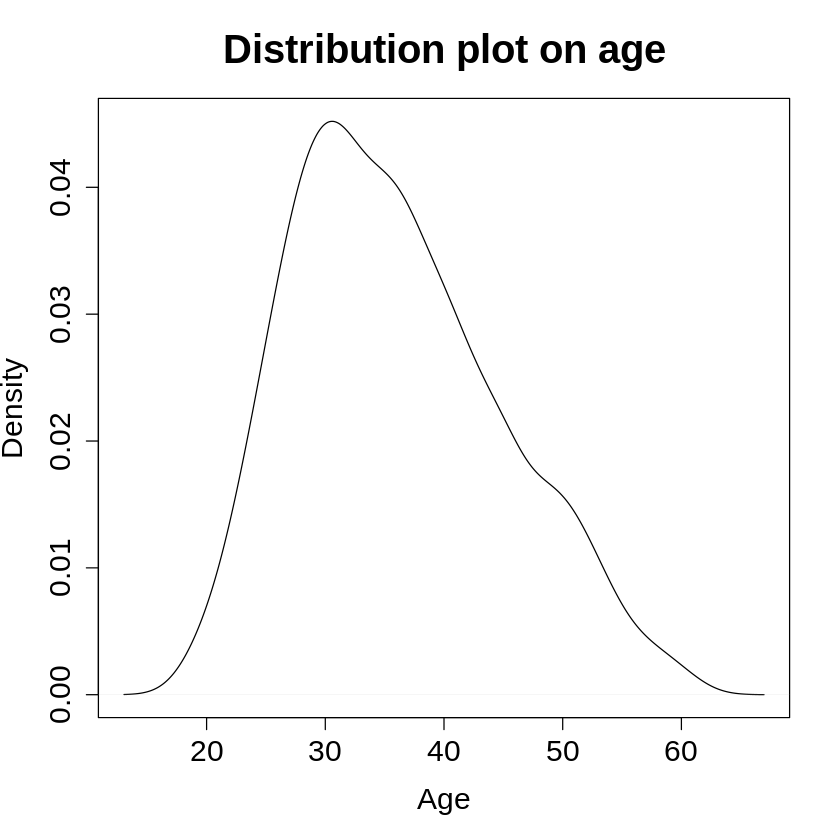

In [136]:
#Plotting the distribution of our age variable
#

plot(density(Ad$Age),
main = 'Distribution plot on age',
xlab = 'Age',
cex.lab=1.5, cex.axis=1.5, cex.main=2.0, cex.sub=1.5)

#Age appears normally distributed and also apperas skewed to the right
#Most individuals are between age 30 to 35

In [137]:
#Listing top countries
#
#First selecting the country
country <- Ad$Country  
Country_frequency <- table(country) #Highest count is 7 for most countries

#Displayinmg countries greater than 8
High_Country_Frequency <- subset(country,Country_frequency>8)
High_Country_Frequency


[1] "Turkey"                    "Bouvet Island (Bouvetoya)"
[3] "Taiwan"                    "Somalia"                  
[5] "New Zealand"               "Georgia"                  
[7] "Brunei Darussalam"         "Bosnia and Herzegovina"

In [138]:
#Listing top cities
#
#First selecting the cities
city <- Ad$City
City_frequency <- table(city) #Highest count is 1 for most cities


#Displaying cities with more than two counts
High_City_Frequency <- subset(city,City_frequency>2)
High_City_Frequency


[1] "Williamsmouth"       "West Gabriellamouth"

#4.b) Bivariate Analysis

In [139]:
#Obtaining the covariance matrix for our variables

cov(Continuous_Variables)

#We do notice a negative linear relationship between age and daily time spent on site and also
#between age and daily internet usage

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage
Daily.Time.Spent.on.Site,251.33709,-46.17415,66130.81,360.9919
Age,-46.17415,77.18611,-21520.93,-141.6348
Area.Income,66130.81091,-21520.92580,179952405.95,198762.5315
Daily.Internet.Usage,360.99188,-141.63482,198762.53,1927.4154


,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage
Daily.Time.Spent.on.Site,1.0000000,-0.3315133,0.3109544,0.5186585
Age,-0.3315133,1.0000000,-0.1826050,-0.3672086
Area.Income,0.3109544,-0.1826050,1.0000000,0.3374955
Daily.Internet.Usage,0.5186585,-0.3672086,0.3374955,1.0000000


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



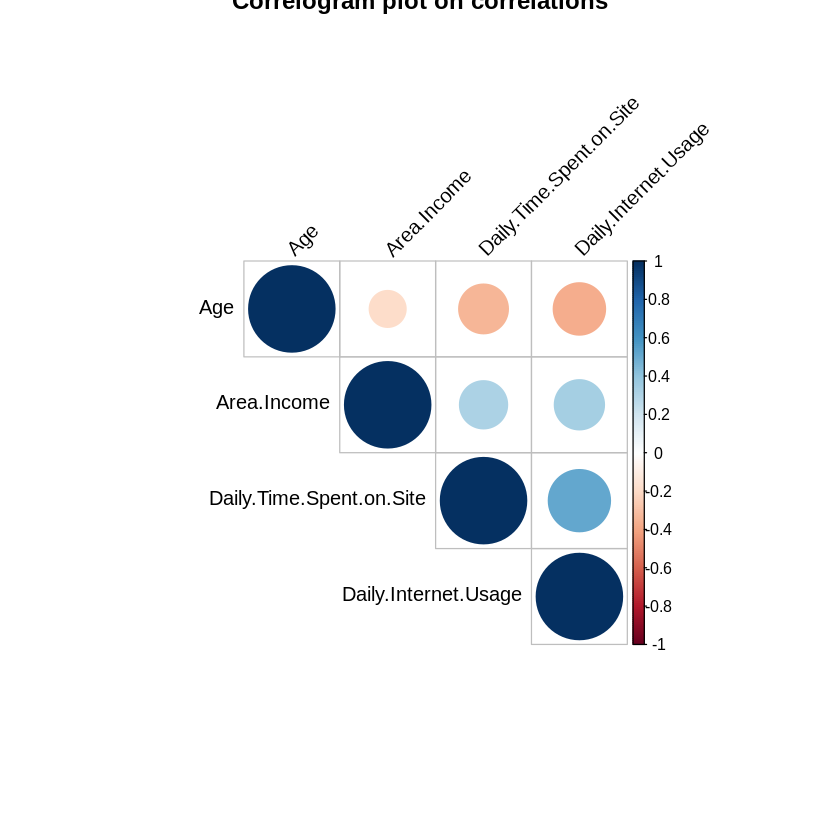

In [140]:
#Checking on correlation on continous variables
#

#Creating correlation matrix
correlation <- cor(Continuous_Variables)
correlation

#Creating a correlogram
install.packages("corrplot")
library(corrplot)
corrplot(correlation, type = "upper", order = "hclust",main = 'Correlogram plot on correlations', 
         tl.col = "black", tl.srt = 45)



#From the below matrix and correlogram, we do notice that age has a negative linear relationship
#with all other variables,we also notice a fairly positive relationship between 
#daily time spent on site and daily internet usage. 


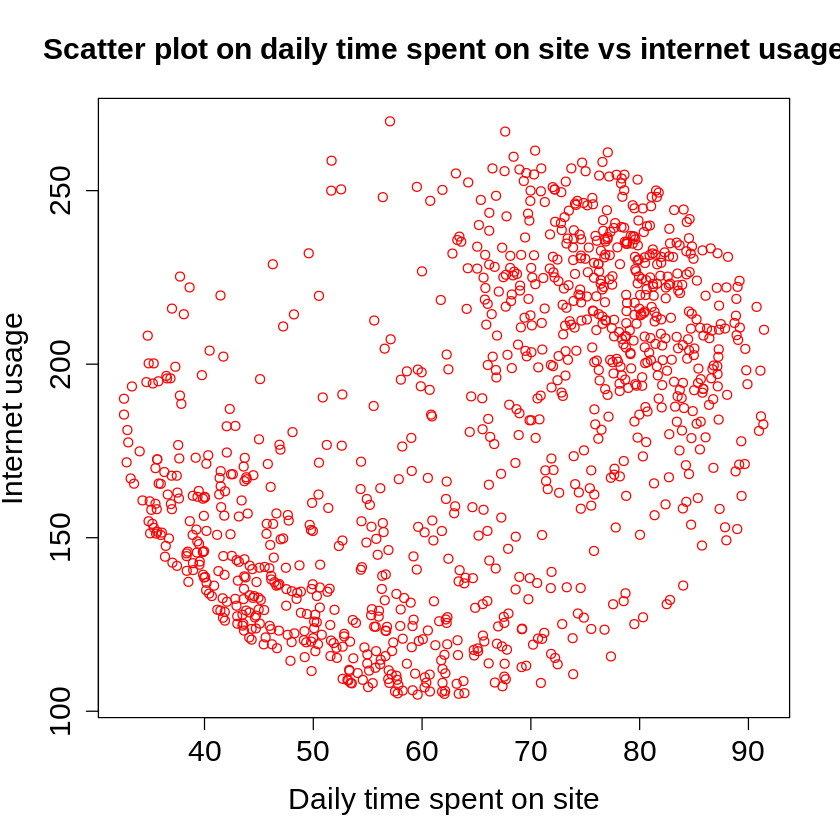

In [141]:
#Scatter plot on daily time spent on site and internet usage

plot(Ad$Daily.Time.Spent.on.Site, Ad$Daily.Internet.Usage,
main = 'Scatter plot on daily time spent on site vs internet usage', 
xlab="Daily time spent on site", 
ylab="Internet usage",
col = 'Red',
cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)


#We can notice a positive linear correlation between the two variables

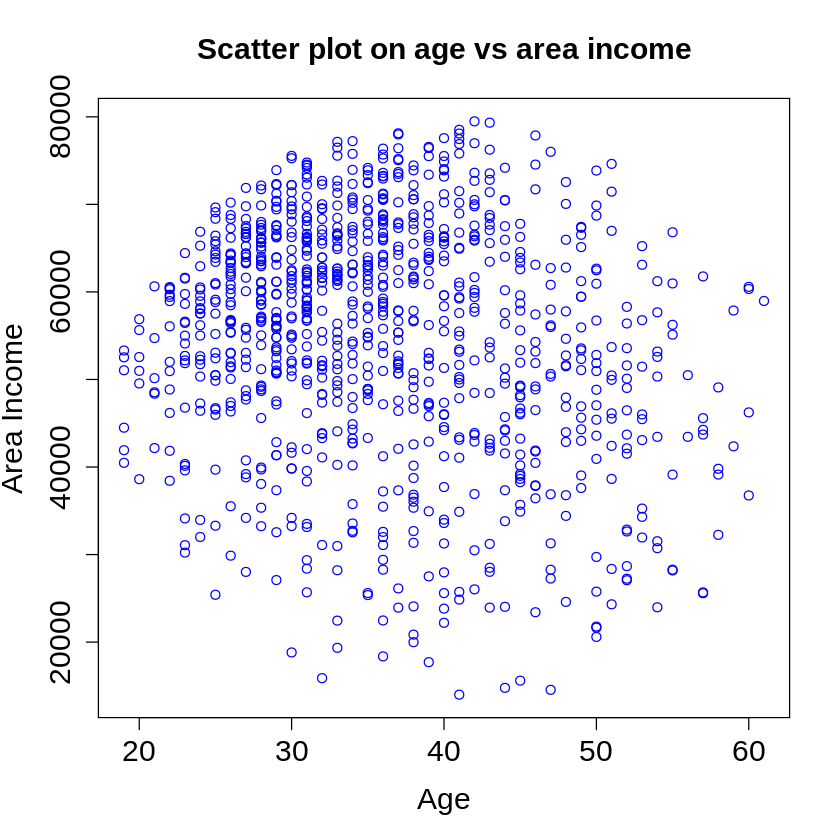

In [142]:
#Scatter plot on area income and age

plot(Ad$Age, Ad$Area.Income,
main = 'Scatter plot on age vs area income', 
xlab="Age", 
ylab="Area Income",
col = 'Blue',
cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)


#We can notice a negative linear correlation between the two variables

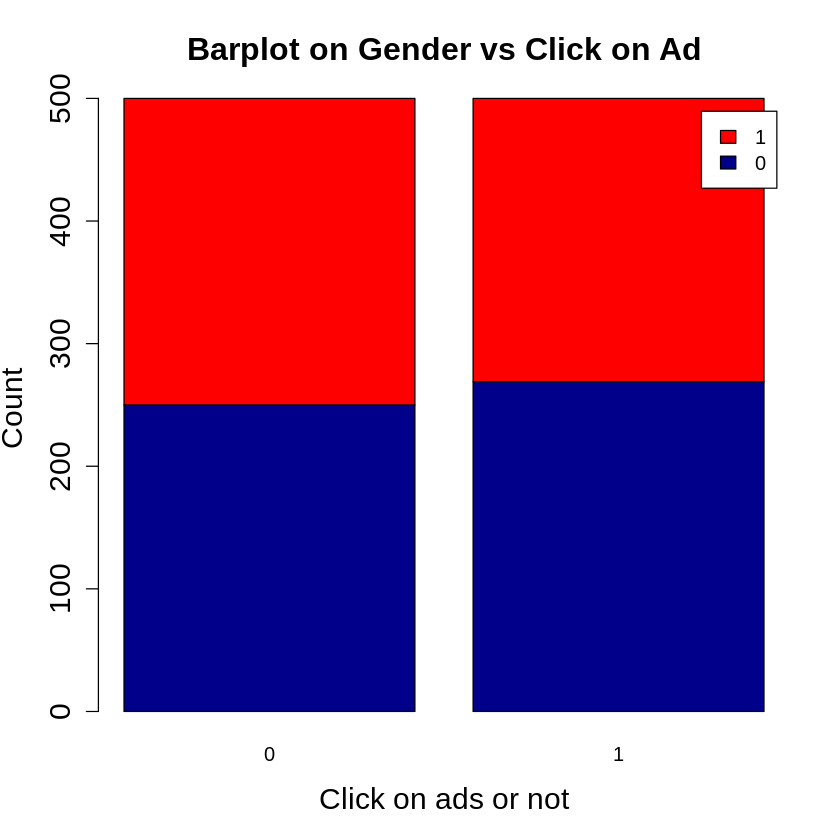

In [143]:
# Stacked Bar Plot with Colors and Legend
#

counts <- table(Ad$Male, Ad$Clicked.on.Ad)
barplot(counts, main="Barplot on Gender vs Click on Ad",
xlab="Click on ads or not", ylab = 'Count', col=c("darkblue","red"),
cex.lab=1.5, cex.axis=1.5, cex.main=1.6, cex.sub=1.5,
legend = rownames(counts))


#5. Feature engineering

In [144]:
#A display of the columns in our dataset
#

glimpse(Ad)

Rows: 1,000
Columns: 10
$ Daily.Time.Spent.on.Site <dbl> 68.95, 80.23, 69.47, 74.15, 68.37, 59.99, 88.…
$ Age                      <int> 35, 31, 26, 29, 35, 23, 33, 48, 30, 20, 49, 3…
$ Area.Income              <dbl> 61833.90, 68441.85, 59785.94, 54806.18, 73889…
$ Daily.Internet.Usage     <dbl> 256.09, 193.77, 236.50, 245.89, 225.58, 226.7…
$ Ad.Topic.Line            <chr> "Cloned 5thgeneration orchestration", "Monito…
$ City                     <chr> "Wrightburgh", "West Jodi", "Davidton", "West…
$ Male                     <int> 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, …
$ Country                  <chr> "Tunisia", "Nauru", "San Marino", "Italy", "I…
$ Timestamp                <chr> "2016-03-27 00:53:11", "2016-04-04 01:39:02",…
$ Clicked.on.Ad            <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, …


In [146]:
#Dropping time stamp column

Ad_final <- select(Ad, -c("Timestamp","Country","City"))
glimpse(Ad_final)

Rows: 1,000
Columns: 7
$ Daily.Time.Spent.on.Site <dbl> 68.95, 80.23, 69.47, 74.15, 68.37, 59.99, 88.…
$ Age                      <int> 35, 31, 26, 29, 35, 23, 33, 48, 30, 20, 49, 3…
$ Area.Income              <dbl> 61833.90, 68441.85, 59785.94, 54806.18, 73889…
$ Daily.Internet.Usage     <dbl> 256.09, 193.77, 236.50, 245.89, 225.58, 226.7…
$ Ad.Topic.Line            <chr> "Cloned 5thgeneration orchestration", "Monito…
$ Male                     <int> 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, …
$ Clicked.on.Ad            <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, …


In [147]:
#One-hot encoding of categorical variables
#

install.packages('dummies')
library(dummies)
Ad_final <- dummy.data.frame(Ad_final, names=c("Ad.Topic.Line","City","Country"), sep="_")
head(Ad_final)

#Creating classes for clicked on Ad column
#

require(plyr)
require(dplyr)

Ad_final$Clicked.on.Ad <- as.character(Ad_final$Clicked.on.Ad)
Ad_final$Clicked.on.Ad <- revalue(Ad_final$Clicked.on.Ad, c("0"="No_Click", "1"="Click"))

head(Ad_final)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”


,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line_Adaptive 24hour Graphic Interface,Ad.Topic.Line_Adaptive asynchronous attitude,Ad.Topic.Line_Adaptive context-sensitive application,Ad.Topic.Line_Adaptive contextually-based methodology,Ad.Topic.Line_Adaptive demand-driven knowledgebase,Ad.Topic.Line_Adaptive uniform capability,⋯,Ad.Topic.Line_Vision-oriented uniform knowledgebase,Ad.Topic.Line_Visionary analyzing structure,Ad.Topic.Line_Visionary asymmetric encryption,Ad.Topic.Line_Visionary client-driven installation,Ad.Topic.Line_Visionary maximized process improvement,Ad.Topic.Line_Visionary mission-critical application,Ad.Topic.Line_Visionary multi-tasking alliance,Ad.Topic.Line_Visionary reciprocal circuit,Male,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,68.95,35,61833.90,256.09,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,80.23,31,68441.85,193.77,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0
3,69.47,26,59785.94,236.50,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,74.15,29,54806.18,245.89,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0
5,68.37,35,73889.99,225.58,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,59.99,23,59761.56,226.74,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0


,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line_Adaptive 24hour Graphic Interface,Ad.Topic.Line_Adaptive asynchronous attitude,Ad.Topic.Line_Adaptive context-sensitive application,Ad.Topic.Line_Adaptive contextually-based methodology,Ad.Topic.Line_Adaptive demand-driven knowledgebase,Ad.Topic.Line_Adaptive uniform capability,⋯,Ad.Topic.Line_Vision-oriented uniform knowledgebase,Ad.Topic.Line_Visionary analyzing structure,Ad.Topic.Line_Visionary asymmetric encryption,Ad.Topic.Line_Visionary client-driven installation,Ad.Topic.Line_Visionary maximized process improvement,Ad.Topic.Line_Visionary mission-critical application,Ad.Topic.Line_Visionary multi-tasking alliance,Ad.Topic.Line_Visionary reciprocal circuit,Male,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,68.95,35,61833.90,256.09,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,No_Click
2,80.23,31,68441.85,193.77,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,No_Click
3,69.47,26,59785.94,236.50,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,No_Click
4,74.15,29,54806.18,245.89,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,No_Click
5,68.37,35,73889.99,225.58,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,No_Click
6,59.99,23,59761.56,226.74,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,No_Click


#6. Implementing the solution - Supervised learning application

#6.a)Decision Trees

In [166]:
#Importing necessary libraries
#

install.packages("caret")
install.packages("rpart.plot")
library(caret)
library(rpart.plot)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [169]:
#Spliting the Dataset

colnames(Ad_final) <- make.names(colnames(Ad_final))

set.seed(3033)
intrain <- createDataPartition(Ad_final$Clicked.on.Ad, p= 0.8, list = FALSE)
training <- Ad_final[intrain,]
testing <- Ad_final[-intrain,]


In [184]:
#Check dimensions of train & test set

dim(training)
dim(testing)

[1]  800 1006

[1]  200 1006

###6.a.1) Training the data with information gain criterion

In [171]:
#Training the decision Tree classifier with criterion as information gain

install.packages("e1071")
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)
set.seed(3333)
dtree_fit <- train(Clicked.on.Ad ~., data = training, method = "rpart",
                   parms = list(split = "information"),
                   trControl=trctrl,
                   tuneLength = 10)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [172]:
#Trained decision tree classifier results
#

dtree_fit

CART 

 800 samples
1005 predictors
   2 classes: 'Click', 'No_Click' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 720, 720, 720, 720, 720, 720, ... 
Resampling results across tuning parameters:

  cp    Accuracy   Kappa    
  0.00  0.9441667  0.8883333
  0.09  0.9104167  0.8208333
  0.18  0.8891667  0.7783333
  0.27  0.8891667  0.7783333
  0.36  0.8891667  0.7783333
  0.45  0.8891667  0.7783333
  0.54  0.8891667  0.7783333
  0.63  0.8891667  0.7783333
  0.72  0.8891667  0.7783333
  0.81  0.6350000  0.2700000

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.

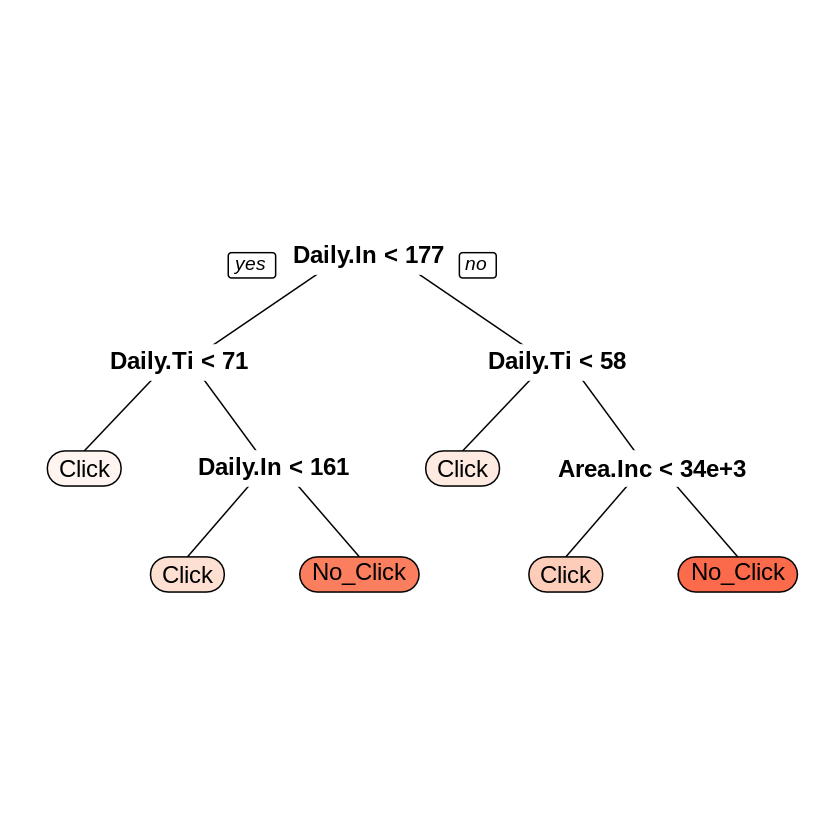

In [173]:
#Visualizing the decision tree
#
	
prp(dtree_fit$finalModel, box.palette = "Reds", tweak = 1.2)

In [174]:
#Making predictions
#

test_pred <- predict(dtree_fit, newdata = testing)
test_pred


[1] No_Click No_Click Click    No_Click Click    No_Click No_Click No_Click
  [9] Click    Click    No_Click Click    No_Click No_Click Click    Click   
 [17] No_Click Click    No_Click No_Click Click    Click    Click    Click   
 [25] Click    Click    No_Click No_Click No_Click No_Click No_Click No_Click
 [33] No_Click Click    Click    Click    Click    Click    Click    Click   
 [41] Click    Click    Click    No_Click Click    Click    No_Click No_Click
 [49] No_Click No_Click No_Click No_Click No_Click No_Click No_Click Click   
 [57] No_Click No_Click No_Click Click    No_Click No_Click No_Click Click   
 [65] No_Click Click    Click    No_Click Click    No_Click No_Click Click   
 [73] No_Click No_Click Click    No_Click No_Click Click    No_Click No_Click
 [81] No_Click Click    Click    Click    No_Click Click    Click    Click   
 [89] Click    Click    No_Click No_Click No_Click Click    No_Click Click   
 [97] Click    Click    No_Click No_Click No_Click No_Click No_Click Click   
[105] No_Click No_Click No_Click No_Click Click    Click    No_Click No_Click
[113] Click    No_Click Click    Click    No_Click Click    No_Click Click   
[121] No_Click No_Click Click    Click    No_Click Click    No_Click No_Click
[129] No_Click Click    No_Click Click    Click    Click    No_Click No_Click
[137] No_Click No_Click Click    Click    No_Click Click    Click    No_Click
[145] Click    Click    No_Click Click    Click    No_Click No_Click Click   
[153] Click    Click    Click    No_Click Click    Click    No_Click No_Click
[161] Click    Click    Click    Click    No_Click Click    No_Click No_Click
[169] No_Click No_Click No_Click No_Click No_Click Click    No_Click Click   
[177] No_Click No_Click Click    Click    No_Click No_Click Click    No_Click
[185] Click    Click    No_Click Click    Click    No_Click No_Click Click   
[193] Click    Click    Click    Click    No_Click No_Click Click    No_Click
Levels: Click No_Click

In [175]:
#Checking the acccuracy
#

Click <- as.factor(testing$Clicked.on.Ad)
confusionMatrix(test_pred, Click) 

Confusion Matrix and Statistics

          Reference
Prediction Click No_Click
  Click       90        6
  No_Click    10       94
                                          
               Accuracy : 0.92            
                 95% CI : (0.8733, 0.9536)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.84            
                                          
 Mcnemar's Test P-Value : 0.4533          
                                          
            Sensitivity : 0.9000          
            Specificity : 0.9400          
         Pos Pred Value : 0.9375          
         Neg Pred Value : 0.9038          
             Prevalence : 0.5000          
         Detection Rate : 0.4500          
   Detection Prevalence : 0.4800          
      Balanced Accuracy : 0.9200          
                                          
       'Positive' Class : Click           
         

The above results show that the classifier with the criterion as information gain is giving 92% of accuracy for the test set.

###6.a.2)Training the Decision Tree classifier with criterion as gini index


In [176]:
#Training the Decision Tree classifier with criterion as gini index

set.seed(3333)
dtree_fit_gini <- train(Clicked.on.Ad ~., data = training, method = "rpart",
                   parms = list(split = "gini"),
                   trControl=trctrl,
                   tuneLength = 10)
dtree_fit_gini

CART 

 800 samples
1005 predictors
   2 classes: 'Click', 'No_Click' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 720, 720, 720, 720, 720, 720, ... 
Resampling results across tuning parameters:

  cp    Accuracy   Kappa    
  0.00  0.9520833  0.9041667
  0.09  0.9041667  0.8083333
  0.18  0.9041667  0.8083333
  0.27  0.9041667  0.8083333
  0.36  0.9041667  0.8083333
  0.45  0.9041667  0.8083333
  0.54  0.9041667  0.8083333
  0.63  0.9041667  0.8083333
  0.72  0.9041667  0.8083333
  0.81  0.6737500  0.3475000

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.

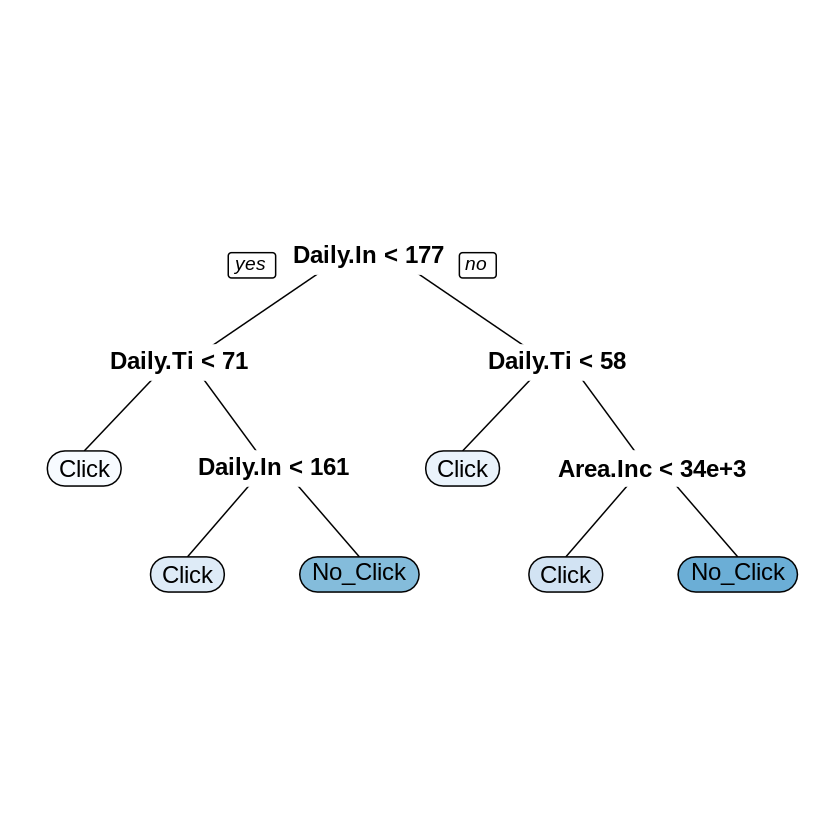

In [177]:
#Plotting the decision tree

prp(dtree_fit_gini$finalModel, box.palette = "Blues", tweak = 1.2)

In [178]:
#Making predictions

test_pred_gini <- predict(dtree_fit_gini,newdata = testing)
test_pred_gini


[1] No_Click No_Click Click    No_Click Click    No_Click No_Click No_Click
  [9] Click    Click    No_Click Click    No_Click No_Click Click    Click   
 [17] No_Click Click    No_Click No_Click Click    Click    Click    Click   
 [25] Click    Click    No_Click No_Click No_Click No_Click No_Click No_Click
 [33] No_Click Click    Click    Click    Click    Click    Click    Click   
 [41] Click    Click    Click    No_Click Click    Click    No_Click No_Click
 [49] No_Click No_Click No_Click No_Click No_Click No_Click No_Click Click   
 [57] No_Click No_Click No_Click Click    No_Click No_Click No_Click Click   
 [65] No_Click Click    Click    No_Click Click    No_Click No_Click Click   
 [73] No_Click No_Click Click    No_Click No_Click Click    No_Click No_Click
 [81] No_Click Click    Click    Click    No_Click Click    Click    Click   
 [89] Click    Click    No_Click No_Click No_Click Click    No_Click Click   
 [97] Click    Click    No_Click No_Click No_Click No_Click No_Click Click   
[105] No_Click No_Click No_Click No_Click Click    Click    No_Click No_Click
[113] Click    No_Click Click    Click    No_Click Click    No_Click Click   
[121] No_Click No_Click Click    Click    No_Click Click    No_Click No_Click
[129] No_Click Click    No_Click Click    Click    Click    No_Click No_Click
[137] No_Click No_Click Click    Click    No_Click Click    Click    No_Click
[145] Click    Click    No_Click Click    Click    No_Click No_Click Click   
[153] Click    Click    Click    No_Click Click    Click    No_Click No_Click
[161] Click    Click    Click    Click    No_Click Click    No_Click No_Click
[169] No_Click No_Click No_Click No_Click No_Click Click    No_Click Click   
[177] No_Click No_Click Click    Click    No_Click No_Click Click    No_Click
[185] Click    Click    No_Click Click    Click    No_Click No_Click Click   
[193] Click    Click    Click    Click    No_Click No_Click Click    No_Click
Levels: Click No_Click

In [179]:
#Confusion matrix to assess model performance

confusionMatrix(test_pred_gini, Click )

Confusion Matrix and Statistics

          Reference
Prediction Click No_Click
  Click       90        6
  No_Click    10       94
                                          
               Accuracy : 0.92            
                 95% CI : (0.8733, 0.9536)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.84            
                                          
 Mcnemar's Test P-Value : 0.4533          
                                          
            Sensitivity : 0.9000          
            Specificity : 0.9400          
         Pos Pred Value : 0.9375          
         Neg Pred Value : 0.9038          
             Prevalence : 0.5000          
         Detection Rate : 0.4500          
   Detection Prevalence : 0.4800          
      Balanced Accuracy : 0.9200          
                                          
       'Positive' Class : Click           
         

The above results show that the classifier with the criterion of gini index is giving 92% of accuracy for the test set.

#6.b) SVM Algorithm

In [180]:
#Checking on initial split dataset
#

dim(training);dim(testing)


[1]  800 1006

[1]  200 1006

In [ ]:
#Training the algorithm
#
install.packages("kernlab")
library(kernlab)


trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)
svm_Linear <- train(Clicked.on.Ad ~., data = training, method = "svmLinear",
trControl=trctrl,
preProcess = c("center", "scale"),
tuneLength = 10)


In [182]:
#Making predictions
#

test_pred <- predict(svm_Linear, newdata = testing)
test_pred


[1] No_Click No_Click Click    No_Click Click    No_Click No_Click No_Click
  [9] Click    Click    No_Click Click    No_Click No_Click Click    Click   
 [17] No_Click Click    Click    No_Click Click    Click    Click    Click   
 [25] Click    No_Click No_Click No_Click No_Click No_Click No_Click No_Click
 [33] No_Click Click    Click    Click    Click    Click    Click    Click   
 [41] Click    Click    Click    No_Click Click    Click    No_Click No_Click
 [49] No_Click No_Click No_Click No_Click No_Click No_Click No_Click Click   
 [57] No_Click No_Click No_Click Click    No_Click No_Click No_Click Click   
 [65] No_Click Click    Click    No_Click Click    No_Click No_Click Click   
 [73] No_Click No_Click Click    No_Click No_Click Click    No_Click No_Click
 [81] No_Click Click    Click    Click    No_Click Click    Click    No_Click
 [89] Click    Click    No_Click No_Click No_Click Click    No_Click Click   
 [97] Click    Click    No_Click No_Click No_Click No_Click No_Click Click   
[105] No_Click No_Click No_Click No_Click Click    Click    No_Click No_Click
[113] Click    No_Click Click    Click    No_Click No_Click No_Click Click   
[121] No_Click No_Click Click    Click    No_Click Click    No_Click No_Click
[129] No_Click No_Click Click    Click    No_Click Click    No_Click No_Click
[137] No_Click No_Click Click    Click    No_Click Click    No_Click No_Click
[145] Click    Click    No_Click Click    No_Click No_Click Click    Click   
[153] Click    Click    No_Click No_Click Click    Click    No_Click No_Click
[161] Click    Click    Click    Click    No_Click Click    No_Click No_Click
[169] No_Click No_Click No_Click No_Click No_Click Click    No_Click Click   
[177] No_Click No_Click Click    Click    No_Click No_Click Click    No_Click
[185] Click    Click    No_Click Click    Click    No_Click No_Click No_Click
[193] Click    Click    Click    Click    No_Click No_Click Click    No_Click
Levels: Click No_Click

In [183]:
#Checking the accuracy of the model
#

confusionMatrix(table(test_pred, Click))

Confusion Matrix and Statistics

          Click
test_pred  Click No_Click
  Click       90        0
  No_Click    10      100
                                        
               Accuracy : 0.95          
                 95% CI : (0.91, 0.9758)
    No Information Rate : 0.5           
    P-Value [Acc > NIR] : < 2.2e-16     
                                        
                  Kappa : 0.9           
                                        
 Mcnemar's Test P-Value : 0.004427      
                                        
            Sensitivity : 0.9000        
            Specificity : 1.0000        
         Pos Pred Value : 1.0000        
         Neg Pred Value : 0.9091        
             Prevalence : 0.5000        
         Detection Rate : 0.4500        
   Detection Prevalence : 0.4500        
      Balanced Accuracy : 0.9500        
                                        
       'Positive' Class : Click         
                                        

The above results show that the classifier with the criterion of gini index is giving 95% of accuracy for the test set

### Conclusion on Decision trees and SVM 

As part of application of the SVM and Decision trees supervised learning techniques, we do notice an accuracy of 95% and 92% respectively and same performance is witnessed in training decision trees model with information gain and gini index criterions. Generally, SVM model did perform better than Decision trees in helping us identify which individuals are most likely to click on the ads in the block.

#7. Challenging the solution

The research was a success as we could be able to perform Exploratory Data Analysis and draw great insights from it all in a bid to identify individuals who are likely to click on ads.However the results could be improved if we had worked with variables that directly determined if one would click on ads or not.

Otherwise we can note the below:

1.The data we used for our research was appropriate to achieve the results.

2.The reaserch was a success as we were abble to perform Exploratory data analysis and draw meaningful insights from it. 

#8. Follow up questions




**1.Did we have the right data?**
Yes, we had the right data to achieve our set objective.


**2.Did we need additional data?**
No, the data we had for our research was adequate.



**3.Did we achieve our set objective?**
Yes we were able to apply supervised learning techniques to select a model that wil help us identify which individuals are most likely to click on the ads in the block.


